In [77]:
import torch
import torch.nn as nn
from torch.optim import SGD
from torch.utils.data import DataLoader, Dataset
from torchsummary import summary


In [78]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [79]:
device = 'cuda'

In [80]:
X = torch.tensor(x).float().to(device=device)
Y = torch.tensor(y).float().to(device=device)

In [81]:
class data(Dataset):
    def __init__(self, x, y) -> None:
        self.x = torch.tensor(x).float().to(device=device)
        self.y = torch.tensor(y).float().to(device=device)
    def __len__(self):
        return len(self.x)
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [82]:
dataloader = DataLoader(data(x, y), batch_size=2, shuffle=True)

In [83]:
class MyNeuralNet(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.input_to_hidden1 = nn.Linear(2, 8)
        self.hidden1_activation = nn.ReLU()
        self.hiddden1_to_output = nn.Linear(8, 1)
    def forward(self, x):
        x = self.input_to_hidden1(x)
        x = self.hidden1_activation(x)
        x = self.hiddden1_to_output(x)
        return x
    
net = MyNeuralNet().to(device=device)

In [84]:
def mse_loss(y_hat, y):
    return torch.mean(torch.pow((y_hat - y), 2))

In [85]:
no_of_epochs = 50
optimizer = SGD(net.parameters(), lr=0.001)

In [86]:
loss_history = []
for _ in range(no_of_epochs):
    for x_batch, y_batch in dataloader:
        
        optimizer.zero_grad()
        y_hat = net(x_batch)
        loss = mse_loss(y_hat, y_batch)
        loss.backward()
        optimizer.step()
        loss_history.append(loss)

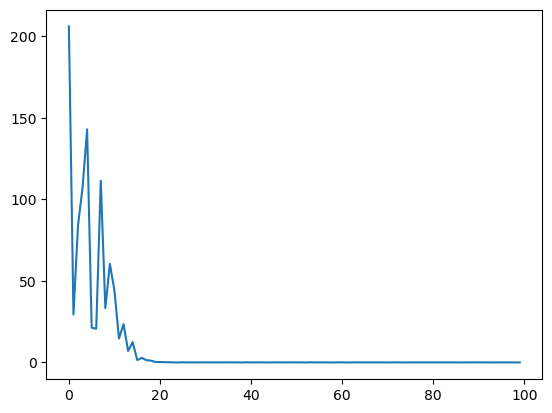

In [87]:
import matplotlib.pyplot as plt

loss_history_cpu = [l.detach().cpu().numpy() for l in loss_history]

plt.plot(loss_history_cpu)

In [88]:
test = [[10, 11]]
test = torch.tensor(test).float().to(device)

In [89]:
net(test)

tensor([[21.4721]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [90]:
summary(net, torch.zeros(1,2))


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [92]:
i = 1
for x, y in dataloader:
    print('iter', i)
    print(x, y)
    i = i + 1

iter 1
tensor([[7., 8.],
        [1., 2.]], device='cuda:0') tensor([[15.],
        [ 3.]], device='cuda:0')
iter 2
tensor([[3., 4.],
        [5., 6.]], device='cuda:0') tensor([[ 7.],
        [11.]], device='cuda:0')
